# Principal Component Analysis

### 1. Step by Step execution

In [43]:
import numpy as np
import pandas as pd

np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = df.append(df1,ignore_index=True)

df = df.sample(40)
     

In [44]:
df.head()  

feature1  feature2  feature3  target
2  -0.367548 -1.137460 -1.322148       1
34  0.177061 -0.598109  1.226512       0
14  0.420623  0.411620 -0.071324       1
11  1.968435 -0.547788 -0.679418       1
12 -2.506230  0.146960  0.606195       1

In [45]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [46]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [47]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [48]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [49]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [50]:
eigen_vectors     

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [51]:
# principal components

pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [52]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

PC1       PC2  target
0  0.599433  1.795862       1
1  1.056919 -0.212737       0
2 -0.271876  0.498222       1
3 -0.621586  0.023110       1
4  1.567286  1.730967       1

In [53]:

new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()
     

In [54]:

new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()
     

### 2. Practical Example(MNIST)

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [58]:
df = pd.read_csv('data/digit-recognizer/train.csv')

In [59]:
df.shape

(42000, 785)

In [61]:
df.sample(5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
24075      8       0       0       0       0       0       0       0       0   
13875      9       0       0       0       0       0       0       0       0   
30468      9       0       0       0       0       0       0       0       0   
38299      6       0       0       0       0       0       0       0       0   
11845      7       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
24075       0  ...         0         0         0         0         0   
13875       0  ...         0         0         0         0         0   
30468       0  ...         0         0         0         0         0   
38299       0  ...         0         0         0         0         0   
11845       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
24075         0         0         0         0         0  
13875         0         0         0         0         0  
30468         0         0         0         0         0  
38299         0         0         0         0         0  
11845         0         0         0         0         0  

[5 rows x 785 columns]

In [62]:
import matplotlib.pyplot as plt

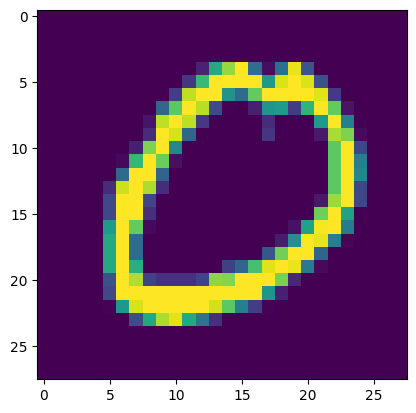

In [63]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [64]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
X_train.shape

(33600, 784)

##### a. Without using pca

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [69]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

14.352824687957764


In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

##### b. with using pca 

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [74]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [75]:
X_train_trf.shape

(33600, 200)

In [76]:
knn = KNeighborsClassifier()

In [77]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [78]:
y_pred = knn.predict(X_test_trf)

In [79]:
accuracy_score(y_test,y_pred)

0.9670238095238095

In [80]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))

0.2733333333333333
0.4220238095238095
0.4847619047619048
0.6192857142857143
0.7297619047619047
0.8189285714285715
0.866904761904762
0.8938095238095238
0.9079761904761905
0.9247619047619048
0.9314285714285714
0.9420238095238095
0.9492857142857143
0.954047619047619
0.954047619047619
0.958452380952381
0.9616666666666667
0.9627380952380953
0.9645238095238096
0.9657142857142857
0.9663095238095238
0.9683333333333334
0.9696428571428571
0.9703571428571428
0.9705952380952381
0.9709523809523809
0.9707142857142858
0.9708333333333333
0.9711904761904762
0.971547619047619
0.9722619047619048
0.9714285714285714
0.9709523809523809
0.9716666666666667
0.9711904761904762
0.971547619047619
0.9721428571428572
0.9719047619047619
0.9729761904761904
0.9723809523809523
0.9720238095238095
0.9720238095238095
0.9725
0.9717857142857143
0.9717857142857143
0.9716666666666667
0.9730952380952381
0.9729761904761904
0.9727380952380953
0.9719047619047619
0.9728571428571429
0.9727380952380953
0.9728571428571429
0.972142857

KeyboardInterrupt: 

### 3. PCA for visualization

In [88]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [89]:
X_train.shape

(33600, 784)

In [90]:
import plotly.express as px

y_train_trf = y_train.astype(str)
fig = px.scatter(
    x=X_train_trf[:,0],
    y=X_train_trf[:,1],
    color=y_train_trf,
    color_discrete_sequence=px.colors.qualitative.G10
)

fig.show()

In [91]:
# transform in 3d
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [92]:
X_train_trf

array([[-226.60149442,  305.86132005,  417.15096374],
       [  38.33557453, -461.09018953,  100.4273769 ],
       [-305.49555786, -351.64552615, -961.32254143],
       ...,
       [ -28.00529026,  596.09682464,  606.28040826],
       [ 233.97324719,   18.61736492, -148.30906412],
       [1096.50076564, -254.70499179, -560.33531995]])

In [95]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(
    df,
    x=X_train_trf[:,0],
    y=X_train_trf[:,1],
    z=X_train_trf[:,2],
    color=y_train_trf,
    color_discrete_sequence=px.colors.qualitative.G10
)

fig.update_layout(
    margin=dict(l=20,r=20,t=20,b=20)
)

fig.show()

In [96]:
# eigen values
pca.explained_variance_

array([335506.57619801, 244807.10463066, 212051.03419524])

In [97]:
# eigen vectors
pca.components_

array([[-2.42942662e-18,  2.21076350e-18,  6.58156596e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 7.74519097e-17, -1.51698349e-17,  1.23965011e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.41128561e-17, -3.92907928e-17, -2.20143595e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

### 4.Finding optimal number of principal components

In [100]:
# transform in 3d
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [102]:
pca.explained_variance_ratio_.shape

(784,)

In [103]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09770722, 0.16900067, 0.2307548 , 0.28465032, 0.33357585,
       0.37694429, 0.40971003, 0.43863706, 0.46634409, 0.4896358 ,
       0.51056687, 0.53103851, 0.54811645, 0.56494851, 0.58079573,
       0.59567555, 0.60890653, 0.6217459 , 0.63357974, 0.6450916 ,
       0.65585129, 0.66609344, 0.6757597 , 0.68493267, 0.69377981,
       0.70211509, 0.7102658 , 0.71801912, 0.72543898, 0.73237223,
       0.73898072, 0.74531281, 0.75134494, 0.75723224, 0.76285054,
       0.76824915, 0.77332825, 0.77819952, 0.78291205, 0.78755761,
       0.79208251, 0.7965231 , 0.80068828, 0.80464464, 0.80848068,
       0.81221196, 0.815819  , 0.81930765, 0.82264965, 0.82582976,
       0.82897181, 0.83204415, 0.83496782, 0.83783336, 0.84062454,
       0.84331783, 0.84596712, 0.84853351, 0.85106204, 0.85351457,
       0.85592008, 0.85831105, 0.86057999, 0.86279635, 0.8649424 ,
       0.86700054, 0.86901774, 0.87098082, 0.87291702, 0.87479944,
       0.87665559, 0.87847316, 0.88022525, 0.88195105, 0.88360

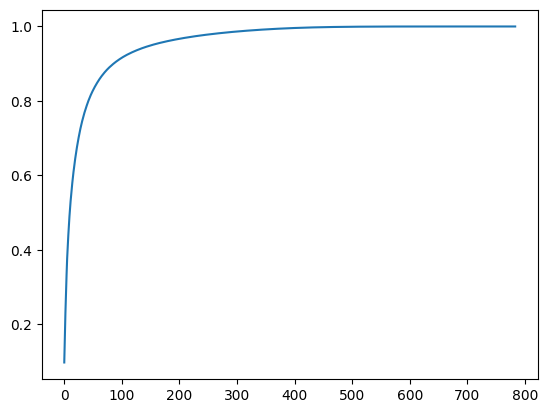

In [104]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))